# Python Visulization of SpringSaLaD Outputs

This notebook demonstrates different ways visualize the CSV outputs generate by SpringSaLaD.

In [1]:
#Import necessary functions and data
from Visualization import *
from data_locator import data_file_finder
from display_info import *
from Project_reader import Describe_input_file

In [2]:
#Create the relative path to your desired SIMULATIONS directory
search_directory = os.path.join('Examples','Nephrin-Nck-NWasp','Final_version_test_SIMULATIONS', 'Simulation0_SIM_SIMULATIONS')

#Get a description of the input file in that directory
Describe_input_file(search_directory, reactions=True, kinetics=True)

Moleclues:

MOLECULE: "NWASP" (Initial Count: 10)
This molecule has 5 site types: dom1, linker, PRM, dom3, dom2

It consists of 16 connected sites:
Site 0 (Intracellular) of type "PRM"
Site 1 (Intracellular) of type "linker"
Site 2 (Intracellular) of type "PRM"
Site 3 (Intracellular) of type "linker"
Site 4 (Intracellular) of type "PRM"
Site 5 (Intracellular) of type "linker"
Site 6 (Intracellular) of type "PRM"
Site 7 (Intracellular) of type "linker"
Site 8 (Intracellular) of type "PRM"
Site 9 (Intracellular) of type "linker"
Site 10 (Intracellular) of type "PRM"
Site 11 (Intracellular) of type "dom1"
Site 12 (Intracellular) of type "dom3"
Site 13 (Intracellular) of type "dom2"
Site 14 (Intracellular) of type "linker"
Site 15 (Intracellular) of type "linker"

It has 15 total links between sites:
Site 0 is connected to site 13, site 1
Site 1 is connected to site 0, site 2
Site 2 is connected to site 1, site 3
Site 3 is connected to site 2, site 4
Site 4 is connected to site 3, site 5
S

In [3]:
#Choose a file in the data folder by giving a search term (some part of the file name) or the full file name
path = data_file_finder(search_directory, ['data'], search_term='BondCounts', file_name=None)
file_info(path, list_neighbors=True)

Selected File:
Simulation0_SIM_AverageBondCounts_0_4.csv

Parent Directory:
Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data

Average Files:
BondCounts_0_4.csv                                  2.0 KB
MoleculeCounts_0_4.csv                              2.6 KB
SiteProperties_NCK_Site_0_0_4.csv                   1.5 KB
SiteProperties_NCK_Site_1_0_4.csv                   1.4 KB
SiteProperties_NCK_Site_2_0_4.csv                   1.5 KB
SiteProperties_NCK_Site_3_0_4.csv                   1.8 KB
SiteProperties_NCK_Site_4_0_4.csv                   819.0 bytes
SiteProperties_NEPHRIN_Site_0_0_4.csv               793.0 bytes
SiteProperties_NEPHRIN_Site_1_0_4.csv               793.0 bytes
SiteProperties_NEPHRIN_Site_2_0_4.csv               793.0 bytes
SiteProperties_NEPHRIN_Site_3_0_4.csv               1.4 KB
SiteProperties_NEPHRIN_Site_4_0_4.csv               1.4 KB
SiteProperties_NEPHRIN_Site_5_0_4.csv               793.0 bytes
Si

Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data/pyStat


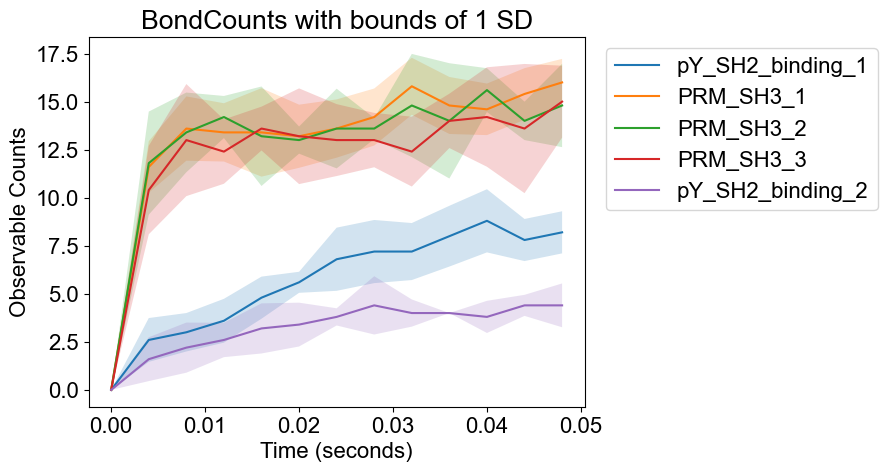

Columns:
0: Time
1: pY_SH2 binding_1
2: PRM_SH3_1
3: PRM_SH3_2
4: PRM_SH3_3
5: pY_SH2_binding_2

List of indicies:
[0, 1, 2, 3, 4, 5]


In [4]:
#Plot the selected data over time
Plotter.plot(path)

#Get a list of columns and their respective indicies
column_info(path)

Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data/pyStat


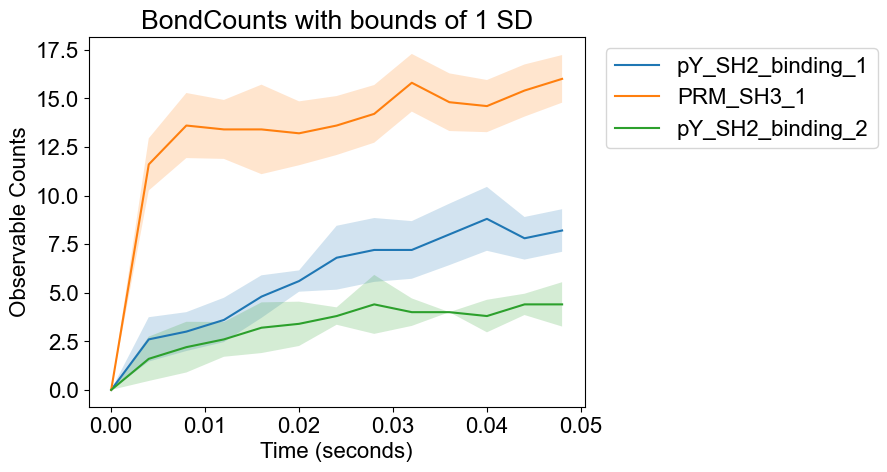

In [5]:
#Select only the columns you want to see graphed
Plotter.plot(path, [1, 2, 5])

Columns:
0: Time
1: TOTAL NWASP
2: FREE NWASP
3: BOUND NWASP
4: TOTAL NCK
5: FREE NCK
6: BOUND NCK
7: TOTAL NEPHRIN
8: FREE NEPHRIN
9: BOUND NEPHRIN

List of indicies:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data/pyStat


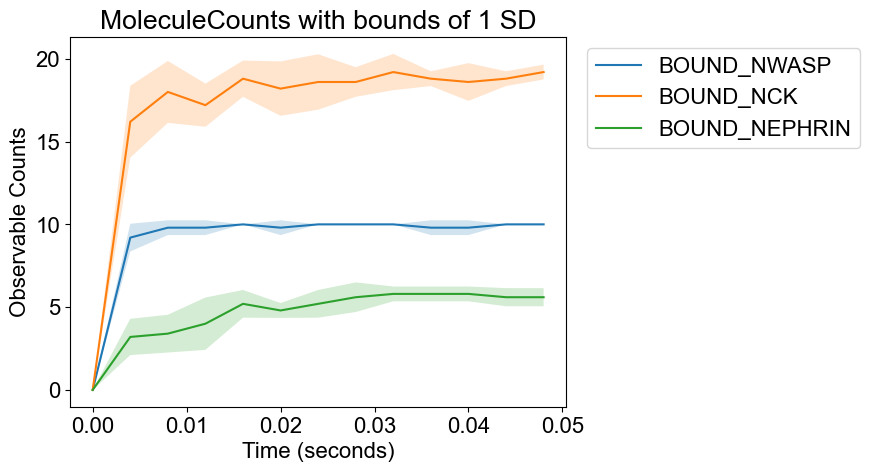

In [6]:
#Change the data file
path = data_file_finder(search_directory, ['data'], 'MoleculeCounts')
column_info(path)
Plotter.plot(path, [3,6,9])

Sites:
0: dom1 of NWASP, dom3 of NWASP, dom2 of NWASP
1: linker of NWASP, linker of NCK
2: PRM of NWASP
3: SH3_1 of NCK, SH3_2 of NCK, SH3_3 of NCK
4: SH2 of NCK
5: dom1 of NEPHRIN, dom2 of NEPHRIN, linker of NEPHRIN, lin_dom of NEPHRIN
6: Anchor of NEPHRIN
7: pTyr_1_2 of NEPHRIN, pTyr_3 of NEPHRIN

List of indicies:
[0, 1, 2, 3, 4, 5, 6, 7]


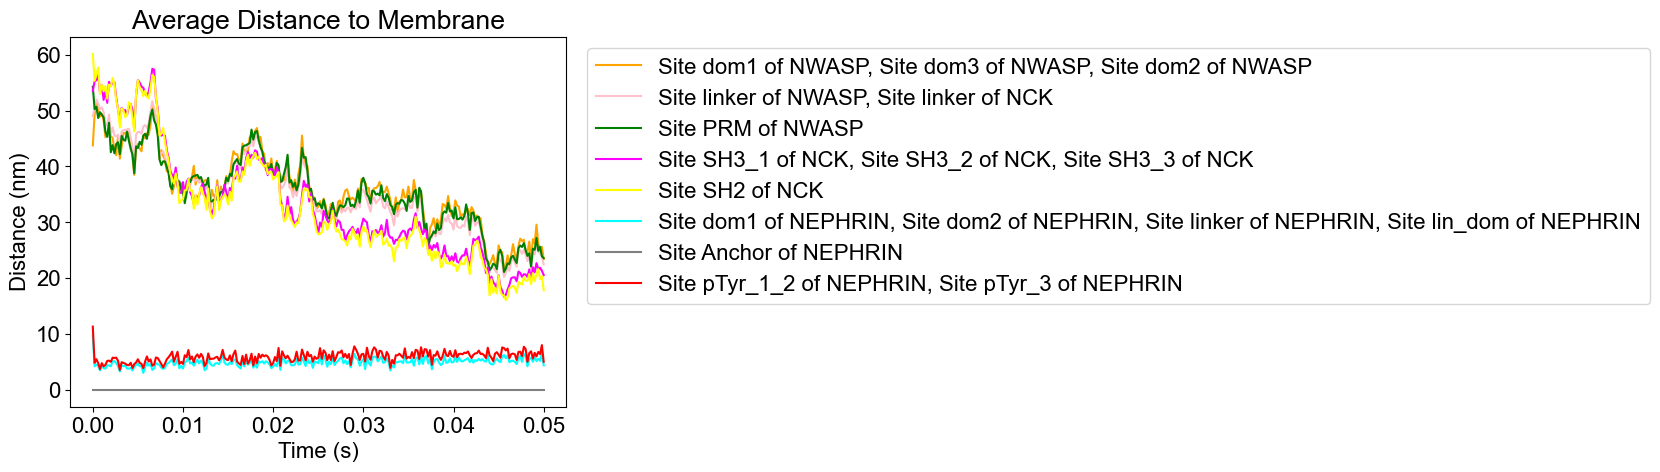

In [7]:
#Show the average Z position of each type of site (all corresponding to the same color)
Average_z_pos.plot(search_directory, indicies=[], run_num=1, verbose=True, legend_right=True, list_sites=True)

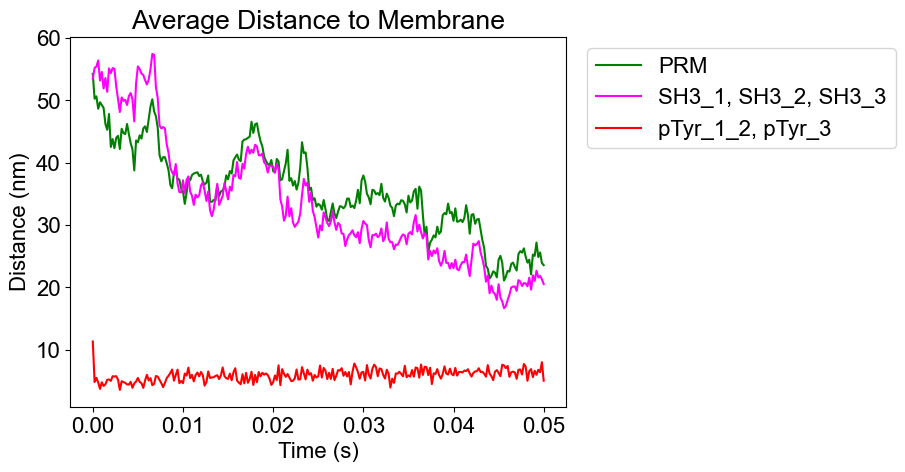

In [8]:
#Shorten legend with Verbose=False and set list_sites=False so only the graph is displayed
Average_z_pos.plot(search_directory, indicies=[2,3,7], run_num=1, verbose=False, legend_right=True, list_sites=False)


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100%


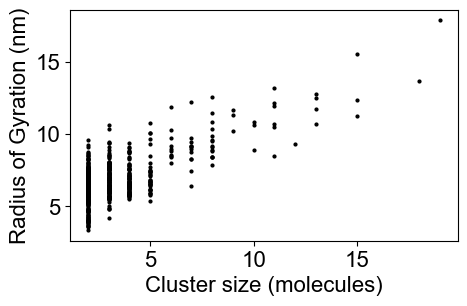

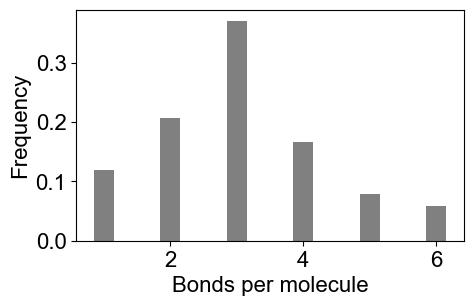

Execution time : 1.2161 secs


In [9]:
#View cluster size distributions over time (shows all the data by default)
Spatial_Analysis.plot(search_directory, [])


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100%


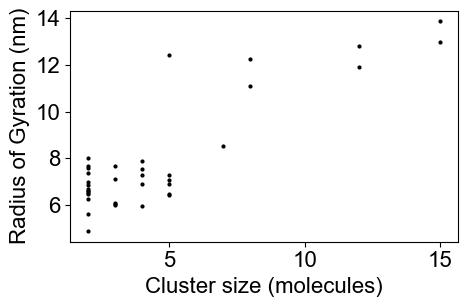

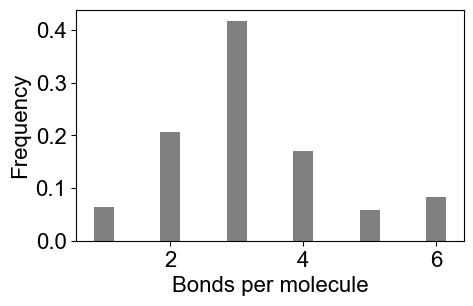

Execution time : 0.7136 secs


In [10]:
#Select a specific point in time
Spatial_Analysis.plot(search_directory, [0.05])

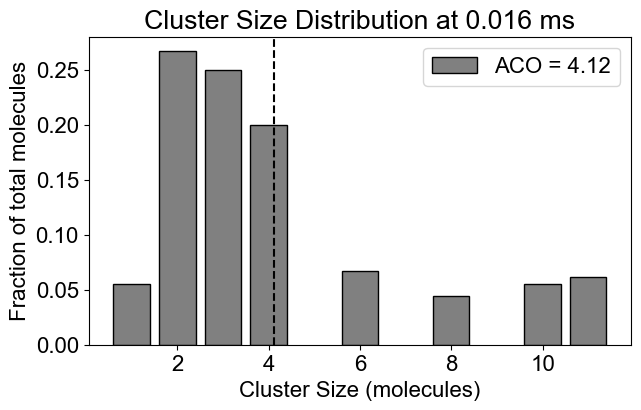

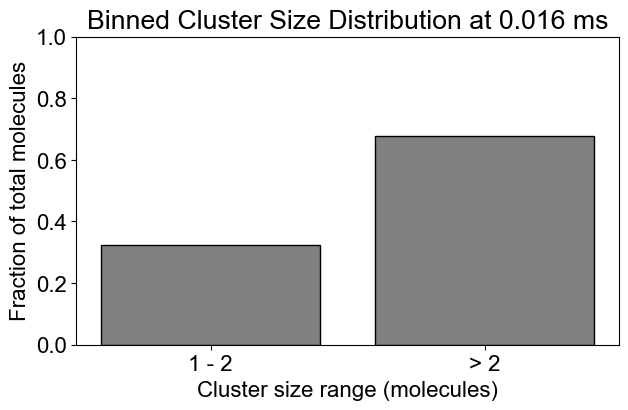

In [11]:
#View cluster size distribution histogram at a particular point in time with or without bins
Histogram.plot(search_directory, [], 16)
Histogram.plot(search_directory, [1,2], 16)